<a href="https://colab.research.google.com/github/Danicoder/Especializacion_IA_BigData/blob/main/DivisionConjuntoDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install liac-arff

In [3]:
import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
"""from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin"""

'from sklearn.preprocessing import RobustScaler\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import RobustScaler\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.base import BaseEstimator, TransformerMixin'

Defino las funciones auxiliares

In [4]:
def load_kdd_dataset(data_path):
    """Lectura del conjunto de datos NSL-KDD."""
    with open(data_path, 'r') as train_set:
        dataset = arff.load(train_set)
    attributes = [attr[0] for attr in dataset["attributes"]]
    return pd.DataFrame(dataset["data"], columns=attributes)


In [5]:
from google.colab import files

# Subir el archivo manualmente
uploaded = files.upload()


Saving KDDTrain%2B.arff to KDDTrain%2B (1).arff


In [6]:
df = load_kdd_dataset("KDDTrain%2B.arff")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [8]:
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75583 entries, 98320 to 121958
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  float64
 5   dst_bytes                    75583 non-null  float64
 6   land                         75583 non-null  object 
 7   wrong_fragment               75583 non-null  float64
 8   urgent                       75583 non-null  float64
 9   hot                          75583 non-null  float64
 10  num_failed_logins            75583 non-null  float64
 11  logged_in                    75583 non-null  object 
 12  num_compromised              75583 non-null  float64
 13  root_shell      

In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50390 entries, 378 to 89600
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     50390 non-null  float64
 1   protocol_type                50390 non-null  object 
 2   service                      50390 non-null  object 
 3   flag                         50390 non-null  object 
 4   src_bytes                    50390 non-null  float64
 5   dst_bytes                    50390 non-null  float64
 6   land                         50390 non-null  object 
 7   wrong_fragment               50390 non-null  float64
 8   urgent                       50390 non-null  float64
 9   hot                          50390 non-null  float64
 10  num_failed_logins            50390 non-null  float64
 11  logged_in                    50390 non-null  object 
 12  num_compromised              50390 non-null  float64
 13  root_shell         

In [11]:
Val_set = X_test
test_set = y_test
train_set = X_train
Val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

In [12]:
print(f"Longitud del Test Set: {len(test_set)}")
print(f"Longitud del Validation Set: {len(Val_set)}")
print(f"Longitud del Training Set: {len(train_set)}")

Longitud del Test Set: 25195
Longitud del Validation Set: 25195
Longitud del Training Set: 75583


In [13]:
train_set, test_set = train_test_split(df, test_size=0.4,
random_state=42, shuffle=False)

In [14]:
train_set, test_set = train_test_split(df, test_size=0.4,
random_state=42, stratify=df["protocol_type"])

In [15]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
    df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(test_set, test_size=0.5,
    random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [16]:
print(f"Longitud del conjunto de datos: {len(df)}")

Longitud del conjunto de datos: 125973


In [17]:
train_set, val_set, test_set = train_val_test_split(df, stratify='protocol_type')

In [18]:
print(f"Longitud del Test Set: {len(test_set)}")
print(f"Longitud del Validation Set: {len(Val_set)}")
print(f"Longitud del Training Set: {len(train_set)}")

Longitud del Test Set: 25195
Longitud del Validation Set: 25195
Longitud del Training Set: 75583


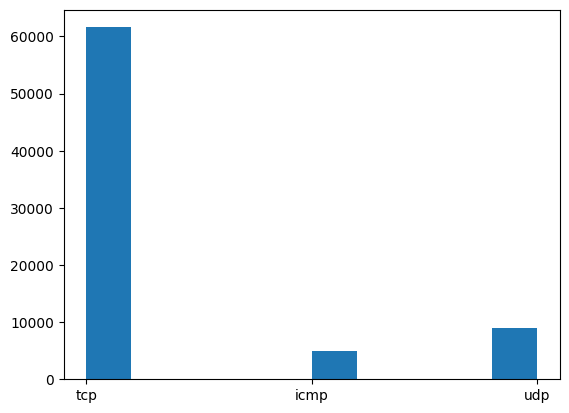

In [22]:
fig, ax = plt.subplots()
x = train_set["protocol_type"]
ax.hist(x)
plt.show()

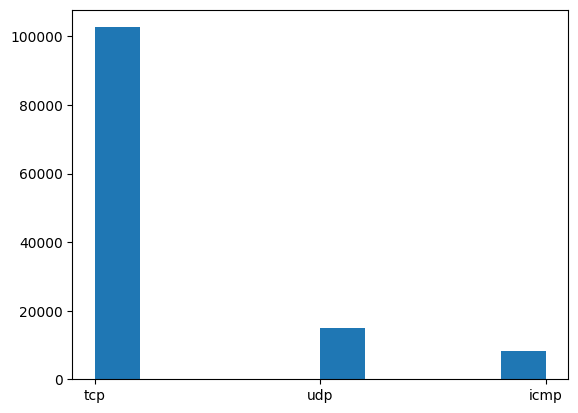

In [21]:
fig, ax = plt.subplots()
x = df["protocol_type"]
ax.hist(x)
plt.show()

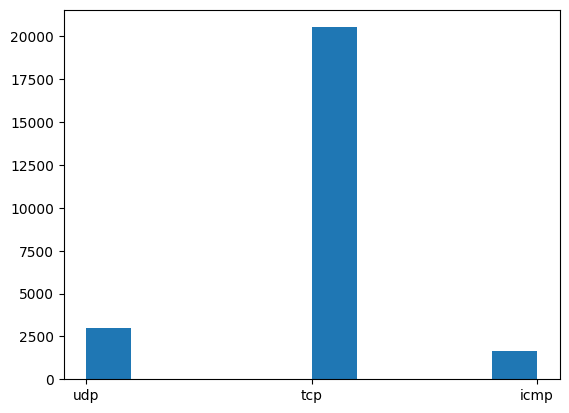

In [23]:
fig, ax = plt.subplots()
x = test_set["protocol_type"]
ax.hist(x)
plt.show()